### <center>Nabila Annisa Ryanthika</center>
#### <center>F1D022016</center>

# Jurnal Modul 4

code berikut merupakan library yang dipakai pada jurnal modul 1 ini.
1.import numpy berfungsi sebagai menampilkan nilai matriks yang berbentuk array
2.import matplotlib/plt berfungsi sebagai menampilkan sebbuah histogram yang ada dibawah
3.import cv2 berfungsi untuk menampilkan gambar pada python
4.import matplotlib.image as mpimg berfungsi untuk menampilkan gambar yang di import ke dalam python

In [429]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import cv2 as cv
import numpy as np

kode dibawah berfungsi sebagai mengconvert color dari beberapa layer menjadi satu layer yaitu abu saja, yang sebelumnya ada beberapa warna dari layer digabung menjadi satu layer yang menghasilkan warna abu dan plt berfungsi untuk menampilkan gambar yang berwarna abu dengan color mapnya gray

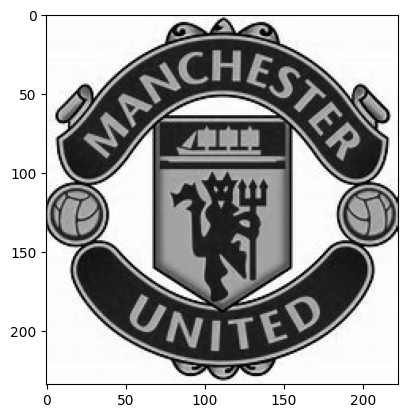

In [430]:
img = img.imread("manchester_united.jpeg")

grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(grayImage, cmap="gray")

# Mean Filtering

In [431]:
kernelm_3 = np.full((3,3), 1/9)

kernelm_9 = np.full((9,9), 1/81)

def filter(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)


    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
         for j in range(widthImage):
             helper = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     helper += image[i+k, j+l] * kernel[k, l]
             result[i, j] = helper
    return result



line diatas adalah sebuah program yang melakukan operasi filter atau penyaringan pada gambar dengan menggunakan kernel matriks tertentu. Kernel matriks tersebut adalah matrix dengan elemen-elemen yang diisi dengan bilangan pecahan (1/9, 1/25, atau 1/49) yang digunakan untuk menghitung rata-rata nilai piksel tetangga dari setiap piksel pada gambar.

Fungsi filter menerima dua parameter: gambar (image) yang akan diproses, dan kernel matriks yang digunakan untuk operasi filter. 

Pertama-tama, program menghitung ukuran gambar dan kernel matriks, lalu menentukan posisi pusat kernel. Kemudian, program melakukan padding pada gambar menggunakan mode "edge". Padding dilakukan agar operasi filter dapat diterapkan pada piksel-piksel di tepi gambar.

Selanjutnya, program membuat matriks kosong yang akan digunakan untuk menyimpan hasil filter. Program melakukan pengulangan pada setiap piksel pada gambar dan mengambil nilai piksel tetangga sesuai dengan ukuran kernel. Setelah itu, program menghitung rata-rata nilai piksel tetangga menggunakan kernel matriks, dan menyimpan hasilnya pada matriks kosong yang sebelumnya telah dibuat.

Akhirnya, program mengembalikan matriks hasil filter sebagai output.

# Median Filtering

In [432]:
kernelmd_3 = np.full((3,3), 0)

kernelmd_9 = np.full((9,9), 0)

line diatas adalah program untuk membuat kernel matriks bernilai nol dengan ukuran 3x3, dan 9x9. Kernel matriks tersebut digunakan untuk melakukan operasi filter pada gambar dengan metode median filter.

Program menggunakan fungsi "full" dari library numpy untuk membuat kernel matriks dengan nilai nol pada setiap elemennya. Nilai nol pada kernel matriks berarti operasi median filter akan mengambil nilai median dari piksel tetangga pada setiap piksel pada gambar.

Variabel "kernelmd_3"dan "kernelmd_9" masing-masing berisi kernel matriks dengan ukuran 3x3 dan 9x9 yang diisi dengan nilai nol. Kernel matriks tersebut akan digunakan pada proses filter dengan metode median filter pada gambar yang akan diproses.

In [433]:
def median(arr):
    n = len(arr)
    sorted_arr = sorted(arr)
    if n % 2 == 0:
        median1 = sorted_arr[n//2]
        median2 = sorted_arr[n//2 - 1]
        median = (median1 + median2)/2
    else:
        median = sorted_arr[n//2]

    return median


def filterm(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
        for j in range(widthImage):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range(heightKernel):
                for l in range(widthKernel):
                    temp[indeks] += image[i+k, j+l]
                    indeks += 1
                    result[i, j] = median(temp)

    return result


line diatas adalah program untuk melakukan operasi filter median pada gambar. Program menggunakan teknik padding untuk menambahkan piksel tambahan pada tepi gambar sebelum dilakukan filter. Variabel "leftPad", "rightPad", "topPad", dan "botPad" digunakan untuk menentukan jumlah piksel yang perlu ditambahkan pada setiap sisi gambar. Setelah proses padding, program melakukan iterasi pada setiap piksel pada gambar dan mengambil nilai piksel tetangga pada area yang sama dengan ukuran kernel matriks yang digunakan. Kemudian, program menyimpan nilai piksel tetangga ke dalam array "temp" dan menghitung nilai median dari array tersebut dengan menggunakan fungsi "median". Nilai median ini akan dijadikan nilai baru untuk piksel yang sedang diproses pada hasil filter. Variabel "result" menyimpan hasil filter median pada gambar.

# Modus Filtering

In [434]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

line di atas merupakan sebuah fungsi untuk mencari nilai modus dari suatu array. Array diiterasi menggunakan loop for, dan setiap nilai dihitung frekuensinya dengan memanfaatkan dictionary untuk menyimpan hitungan. Setelah itu, dilakukan iterasi kedua pada dictionary untuk mencari nilai yang paling banyak muncul dalam array (modus) dan mengembalikannya dari fungsi ini.

In [435]:
def filtermd(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = modus(temp)
             
    return result

line di atas adalah implementasi dari filter modus pada citra. Filter modus adalah teknik pengolahan citra untuk mengurangi derau pada citra digital. Teknik ini bekerja dengan mengganti setiap nilai piksel dengan nilai modus (nilai yang paling sering muncul) dalam daerah tetangga tertentu yang ditentukan oleh kernel. 

Pada kode di atas, citra di-pad terlebih dahulu dengan ukuran kernel sebelum dilakukan pengolahan. Kemudian, dilakukan iterasi pada setiap piksel pada citra dan pengambilan daerah tetangga dengan ukuran kernel. Setiap nilai pada daerah tetangga diambil dan dimasukkan ke dalam array temp. Array temp kemudian dicari nilai modusnya dengan menggunakan fungsi modus yang telah didefinisikan sebelumnya. Hasil nilai modus akan dijadikan nilai piksel pada citra hasil yang baru dalam variabel result.

In [436]:
kernel_sharpening = np.array([[1/10,1/10,1/10],
                             [1/10,1/5,1/10],
                             [1/10,1/10,1/10]])
kernel_smothing = np.array([[1/9,1/9,1/9],
                             [1/9,8/9,1/9],
                             [1/9,1/9,1/9]])

line di atas adalah implementasi dari image sharpening dan image smoothing pada citra. image sharpening adalah proses meningkatkan ketajaman dan detail dalam sebuah gambar. image smoothing adalah proses mengurangi detail atau kebisingan dalam sebuah gambar untuk menciptakan tampilan yang lebih halus atau lebih kabur. nilai kernel yang dibuat adalah berdaasarkan soal jurnal yang diberikan

In [437]:
def padding (img, kernel):
    if len(kernel)%2 == 0:
        n = int(len(kernel)/2)
        result = np.pad (img, ([0,n],[0,n]))
    else:
        n = int((len(kernel)-1)/2)
        result = np.pad (img, ([n,n],[n,n]))
    return result

pada Fungsi padding pertama-tama memeriksa apakah panjang kernel (matriks filter) adalah genap atau ganjil. Jika genap, maka padding akan ditambahkan sebanyak setengah panjang kernel ke setiap sisi gambar. Jika ganjil, padding akan ditambahkan sehingga setiap sisi gambar akan memiliki padding setengah panjang kernel di sekitarnya. fungsinya adalah untuk  memastikan bahwa ukuran gambar yang diproses tetap konsisten selama operasi konvolusi 

In [438]:
def konvolusi(pad, img, kernel):
    result = np.zeros(img.shape).astype(int)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            
            for k in range(len(kernel)):
                for l in range(len(kernel)):
                    result[i,j] += pad[i+k,j+l] * kernel[k][l]
    return result

pada Fungsi konvolusi pertama-tama, fungsi ini membuat matriks kosong result  yang memiliki dimensi yang sama dengan gambar input (img). lalu dilakukan  iterasi melalui setiap piksel dalam gambar input. Untuk setiap piksel, dilakukan iterasi melalui ukuran kernel. Pada setiap langkah iterasi, nilai dari piksel input dan nilai kernel di posisi yang sesuai dikalikan, dan hasilnya ditambahkan ke nilai piksel yang sesuai dalam matriks result.

In [439]:
def edge_Detection(image,kernel1,kernel2):
    pad_image = padding(image,kernel1)

    konv1 = konvolusi(pad_image,image,kernel1)
    konv2 = konvolusi(pad_image,image,kernel2)


    result = np.sqrt(konv1**2 + konv2**2)

    return result


pada Fungsi edge_Detection pertama-tama, fungsi ini menggunakan fungsi padding untuk menambahkan padding ke gambar input menggunakan kernel yang diberikan (kernel1). lalu dilakukan  konvolusi pada gambar input dengan dua kernel yang diberikan (kernel1 dan kernel2). Hasil konvolusi dari kedua kernel itu digunakan untuk menghitung magnitudo gradien di setiap piksel yang dilakukan mneggunakan rumus phytagoras.

In [440]:
sobelX = [[-1, 0, 1],
      [-2, 0, 2],
      [-1, 0, 1]]
sobelY= [[ 1, 2, 1],
      [ 0, 0, 0],
      [-1,-2,-1]]

Kernel sobelX dan sobelY adalah kernel Sobel yang umum digunakan dalam deteksi tepi pada gambar. sobelX untuk mendeteksi perubahan tajam dalam intensitas piksel di arah horizontal, sedangkan sobelY untuk mendeteksi perubahan tajam dalam intensitas piksel di arah vertikal.

In [441]:
prewit_x = [[-1, 0, 1],
      [-1, 0, 1],
      [-1, 0, 1]]
prewit_y = [[ 1, 1, 1],
      [ 0, 0, 0],
      [-1,-1,-1]]

Kernel prewit_x dan prewit_y adalah kernel dari operator Prewitt, yang sering digunakan dalam deteksi tepi pada gambar. prewit_x untuk mendeteksi perubahan tajam dalam intensitas piksel di arah horizontal, sedangkan prewit_y untuk mendeteksi perubahan tajam dalam intensitas piksel di arah vertikal.

In [442]:
robert_x= [[ 1, 0],
      [ 0,-1]]
robert_y= [[ 0, 1],
      [-1, 0]]

Kernel robert_x dan robert_y adalah kernel dari operator Prewitt, yang sering digunakan dalam deteksi tepi pada gambar. robert_x untuk mendeteksi perubahan tajam dalam intensitas piksel di arah horizontal, sedangkan robert_y untuk mendeteksi perubahan tajam dalam intensitas piksel di arah vertikal.

(-0.5, 222.5, 233.5, -0.5)

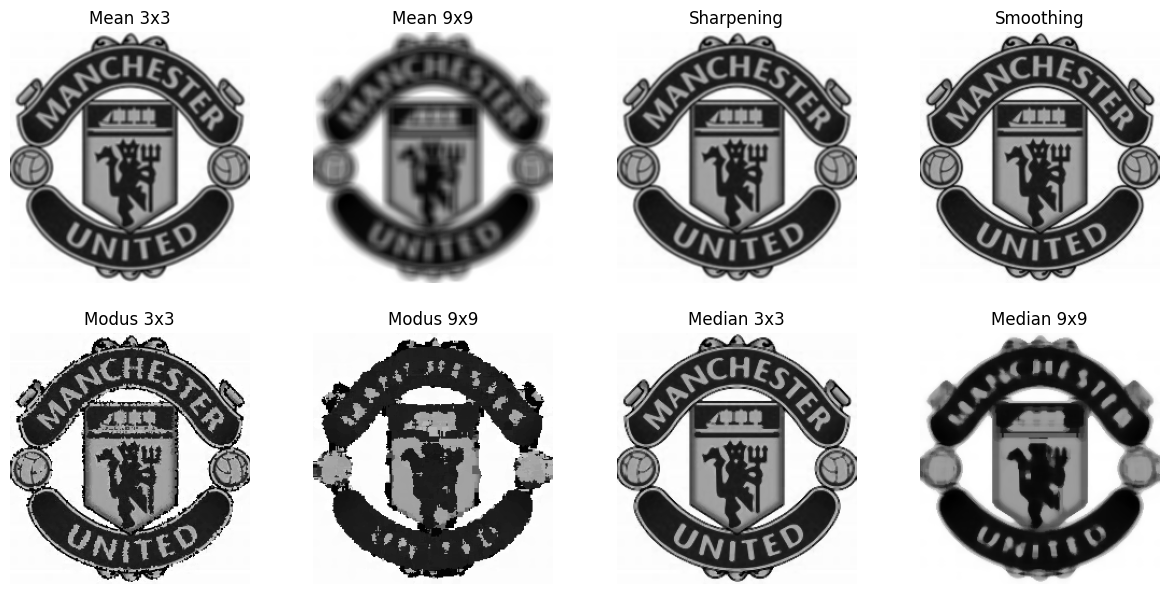

In [443]:
mean_3 = filter(grayImage, kernelm_3)
mean_9 = filter(grayImage, kernelm_9)

median_3 = filterm(grayImage, kernelmd_3)
median_9 = filterm(grayImage, kernelmd_9)

modus_3 = filtermd(grayImage, kernelmd_3)
modus_9 = filtermd(grayImage, kernelmd_9)

sharpened_img = filter(grayImage, kernel_sharpening)

smoothed_image = filter(grayImage, kernel_smothing)

figure = plt.figure(figsize = [15, 15])
    
figure.add_subplot(4, 4, 1)
plt.imshow(mean_3, cmap ='gray')
plt.title ('Mean 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 2)
plt.imshow(mean_9, cmap ='gray')
plt.title ('Mean 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 3)
plt.imshow(sharpened_img, cmap="gray")
plt.title('Sharpening')
plt.axis('off')

figure.add_subplot(4, 4, 4)
plt.imshow(smoothed_image, cmap="gray")
plt.title('Smoothing')
plt.axis('off')

figure.add_subplot(4, 4, 5)
plt.imshow(modus_3, cmap ='gray')
plt.title ('Modus 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 6)
plt.imshow(modus_9, cmap ='gray')
plt.title ('Modus 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 7)
plt.imshow(median_3, cmap ='gray')
plt.title ('Median 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 8)
plt.imshow(median_9, cmap ='gray')
plt.title ('Median 9x9')
plt.axis('off')

kode di atas digunakna untuk memanggil fungsi" yang sudah ada sebelumnya untuk menampilkan gambar-gambar dari mean, media, modus, sharpeing, dan smooting dari citra grayImage

(-0.5, 222.5, 233.5, -0.5)

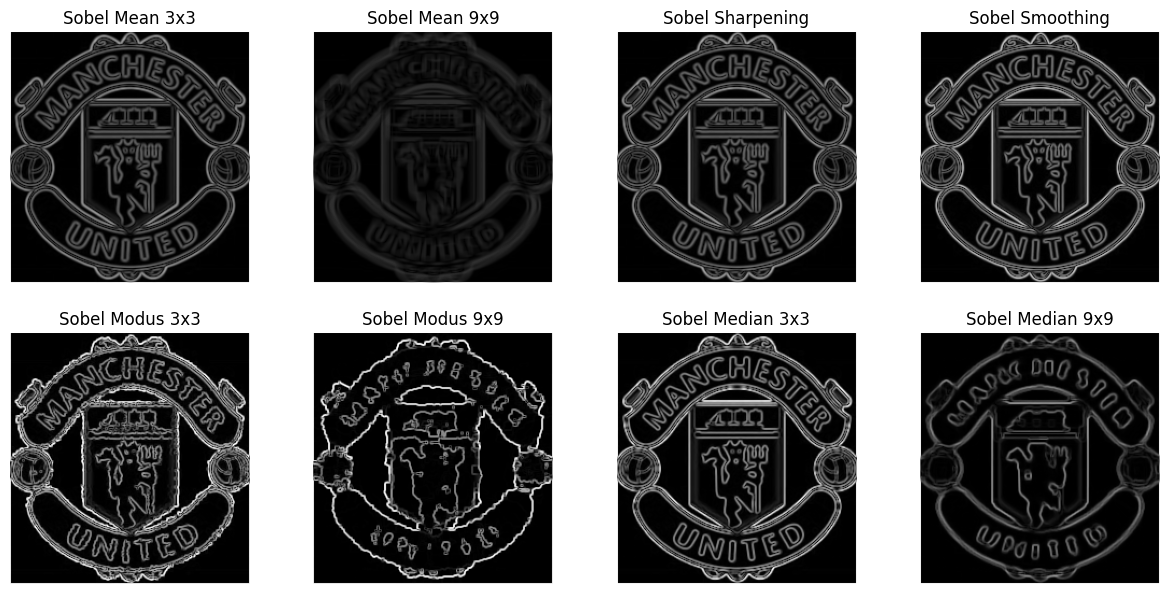

In [444]:
sobel_m3 = edge_Detection(mean_3, sobelX, sobelY)
sobel_m9 = edge_Detection(mean_9, sobelX, sobelY)

sobel_md3 = edge_Detection(median_3, sobelX, sobelY)
sobel_md9 = edge_Detection(median_9, sobelX, sobelY)

sobel_ms3 = edge_Detection(modus_3, sobelX, sobelY)
sobel_ms9 = edge_Detection(modus_9, sobelX, sobelY)

ssharpened_img = edge_Detection(sharpened_img, sobelX, sobelY)
ssmoothed_image = edge_Detection(smoothed_image, sobelX, sobelY)

figure = plt.figure(figsize = [15, 15])
    
figure.add_subplot(4, 4, 1)
plt.imshow(sobel_m3, cmap ='gray')
plt.title ('Sobel Mean 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 2)
plt.imshow(sobel_m9, cmap ='gray')
plt.title ('Sobel Mean 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 3)
plt.imshow(ssharpened_img, cmap="gray")
plt.title('Sobel Sharpening')
plt.axis('off')

figure.add_subplot(4, 4, 4)
plt.imshow(ssmoothed_image, cmap="gray")
plt.title('Sobel Smoothing')
plt.axis('off')

figure.add_subplot(4, 4, 5)
plt.imshow(sobel_ms3, cmap ='gray')
plt.title ('Sobel Modus 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 6)
plt.imshow(sobel_ms9, cmap ='gray')
plt.title ('Sobel Modus 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 7)
plt.imshow(sobel_md3, cmap ='gray')
plt.title ('Sobel Median 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 8)
plt.imshow(sobel_md9, cmap ='gray')
plt.title ('Sobel Median 9x9')
plt.axis('off')

kode di atas digunakna untuk memanggil fungsi sobel yang sudah ada sebelumnya untuk menampilkan gambar-gambar dari mean, media, modus, sharpeing, dan smooting hasil operator sobel yang menggunakan citra hasil mean, media, modus, sharpeing, dan smooting

(-0.5, 222.5, 233.5, -0.5)

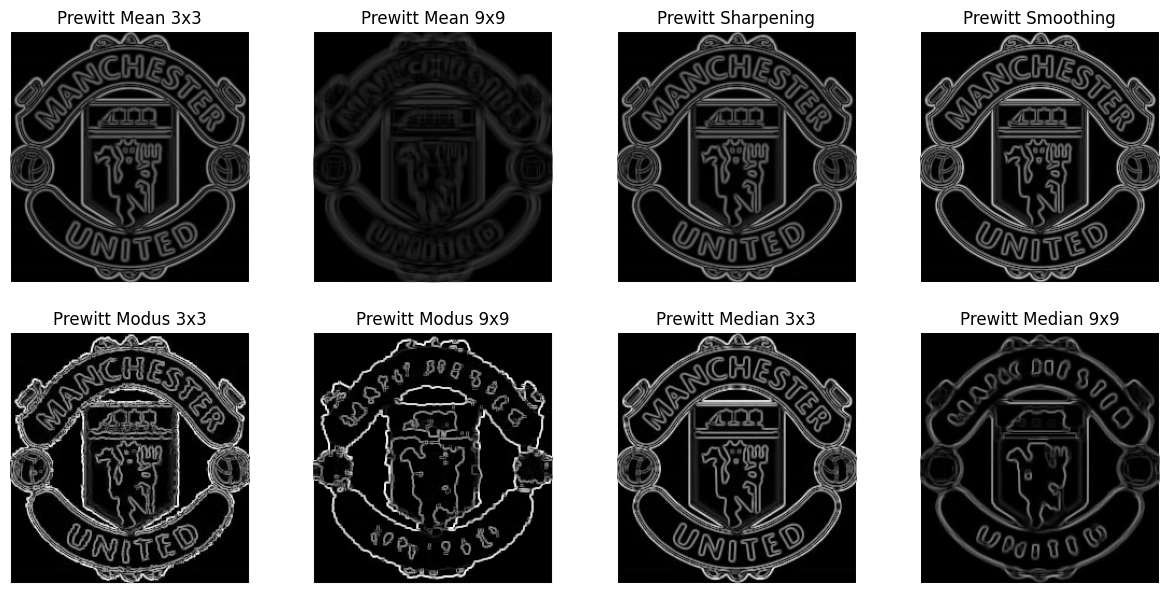

In [445]:
prewitt_m3 = edge_Detection(mean_3, prewit_x, prewit_y)
prewitt_m9 = edge_Detection(mean_9, prewit_x, prewit_y)

prewitt_md3 = edge_Detection(median_3, prewit_x, prewit_y)
prewitt_md9 = edge_Detection(median_9, prewit_x, prewit_y)

prewitt_ms3 = edge_Detection(modus_3, prewit_x, prewit_y)
prewitt_ms9 = edge_Detection(modus_9, prewit_x, prewit_y)

psharpened_img = edge_Detection(sharpened_img, prewit_x, prewit_y)
psmoothed_image = edge_Detection(smoothed_image, prewit_x, prewit_y)

figure = plt.figure(figsize = [15, 15])
    
figure.add_subplot(4, 4, 1)
plt.imshow(prewitt_m3, cmap ='gray')
plt.title ('Prewitt Mean 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 2)
plt.imshow(prewitt_m9, cmap ='gray')
plt.title ('Prewitt Mean 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 3)
plt.imshow(psharpened_img, cmap="gray")
plt.title('Prewitt Sharpening')
plt.axis('off')

figure.add_subplot(4, 4, 4)
plt.imshow(psmoothed_image, cmap="gray")
plt.title('Prewitt Smoothing')
plt.axis('off')

figure.add_subplot(4, 4, 5)
plt.imshow(prewitt_ms3, cmap ='gray')
plt.title ('Prewitt Modus 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 6)
plt.imshow(prewitt_ms9, cmap ='gray')
plt.title ('Prewitt Modus 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 7)
plt.imshow(prewitt_md3, cmap ='gray')
plt.title ('Prewitt Median 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 8)
plt.imshow(prewitt_md9, cmap ='gray')
plt.title ('Prewitt Median 9x9')
plt.axis('off')

kode di atas digunakna untuk memanggil fungsi soprewitt bel yang sudah ada sebelumnya untuk menampilkan gambar-gambar dari mean, media, modus, sharpeing, dan smooting hasil operator prewitt yang menggunakan citra hasil mean, media, modus, sharpeing, dan smooting

(-0.5, 222.5, 233.5, -0.5)

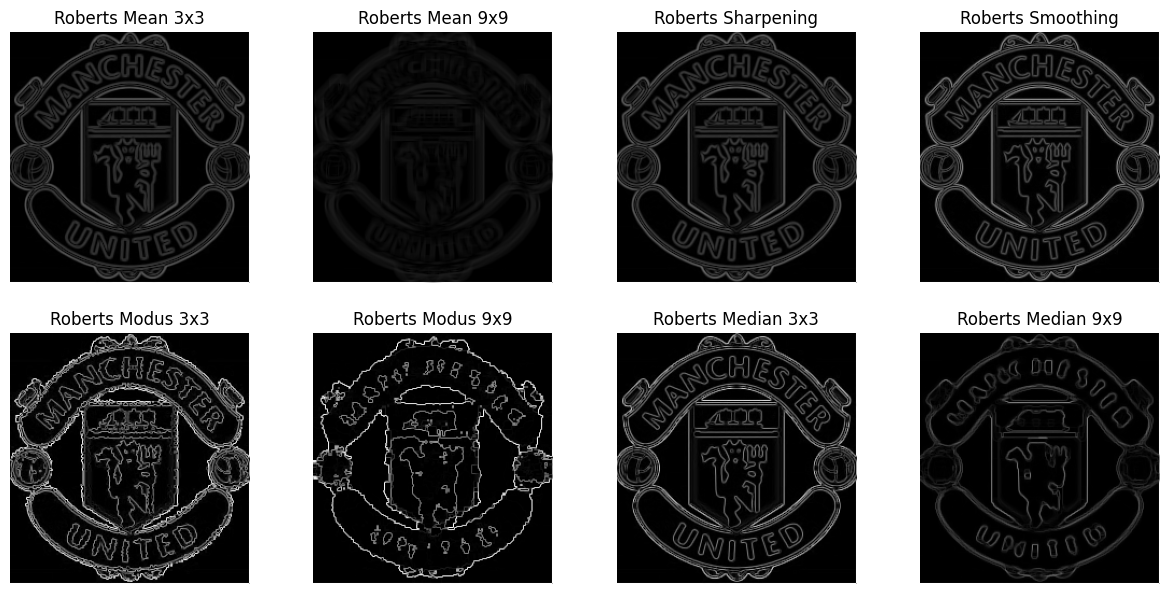

In [446]:
roberts_m3 = edge_Detection(mean_3, robert_x, robert_y)
roberts_m9 = edge_Detection(mean_9, robert_x, robert_y)

roberts_md3 = edge_Detection(median_3, robert_x, robert_y)
roberts_md9 = edge_Detection(median_9, robert_x, robert_y)

roberts_ms3 = edge_Detection(modus_3, robert_x, robert_y)
roberts_ms9 = edge_Detection(modus_9, robert_x, robert_y)

rsharpened_img = edge_Detection(sharpened_img, robert_x, robert_y)
rsmoothed_image = edge_Detection(smoothed_image, robert_x, robert_y)

figure = plt.figure(figsize = [15, 15])
    
figure.add_subplot(4, 4, 1)
plt.imshow(roberts_m3, cmap ='gray')
plt.title ('Roberts Mean 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 2)
plt.imshow(roberts_m9, cmap ='gray')
plt.title ('Roberts Mean 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 3)
plt.imshow(rsharpened_img, cmap="gray")
plt.title('Roberts Sharpening')
plt.axis('off')

figure.add_subplot(4, 4, 4)
plt.imshow(rsmoothed_image, cmap="gray")
plt.title('Roberts Smoothing')
plt.axis('off')

figure.add_subplot(4, 4, 5)
plt.imshow(roberts_ms3, cmap ='gray')
plt.title ('Roberts Modus 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 6)
plt.imshow(roberts_ms9, cmap ='gray')
plt.title ('Roberts Modus 9x9')
plt.axis('off')

figure.add_subplot(4, 4, 7)
plt.imshow(roberts_md3, cmap ='gray')
plt.title ('Roberts Median 3x3')
plt.axis('off')
    
figure.add_subplot(4, 4, 8)
plt.imshow(roberts_md9, cmap ='gray')
plt.title ('Roberts Median 9x9')
plt.axis('off')

kode di atas digunakna untuk memanggil fungsi roberts yang sudah ada sebelumnya untuk menampilkan gambar-gambar dari mean, media, modus, sharpeing, dan smooting hasil operator srobertsobel yang menggunakan citra hasil mean, media, modus, sharpeing, dan smooting